# Wie geht man mit Ausreißern um?

Manchmal beeinflussen ein paar Ausreißer die gesamte Analyse, und man möchte nicht, dass ein paar wenige Datenpunkte das Endergebnis massiv beeinflussen. Schauen wir uns nochmal die Einkommensdaten an, und fügen Donald Trump hinzu: 

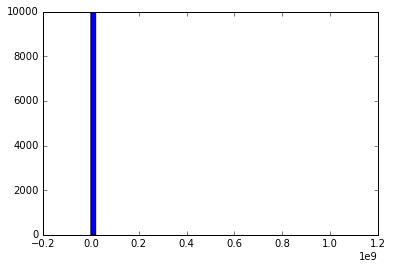

In [1]:
%matplotlib inline
import numpy as np

incomes = np.random.normal(27000, 15000, 10000)
incomes = np.append(incomes, [1000000000])

import matplotlib.pyplot as plt
plt.hist(incomes, 50)
plt.show()

Das Diagramm nützt uns nicht viel. Ein Millardär verändert die gesmate Auswertung. Zudem ist der Mittelwert massiv beeinflusst: 

In [3]:
incomes.mean()

127004.42225607907

Bevor man die Ausreißer einfach so entfernt, muss man zuerst versuchen, die Ursache zu finden. Wo kommt der Ausreißer her? Darf man diesen Ausreißer entfernen, ohne dass das das Endergebnis negativ beeinflusst? 

In diesem Beispiel möchte man herausfinden, was das Einkommen von normalen Personen ist. Hier dürfte man dann einen Ausreißer wie Donald Trump entfernen, schließlich soll ja nur der "normale" Einkommensbereich betrachtet werden. 

Statt einfach irgendein Limit zu setzen, kann man auch z.B. sagen, man entfernt alle Datensätze, die weiter als 2 Standardabweichungen vom Median entfernt sind: 

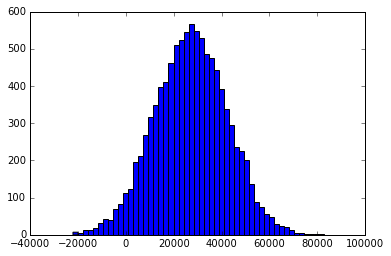

In [4]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered

filtered = reject_outliers(incomes)

plt.hist(filtered, 50)
plt.show()

Das sieht schonmal sehr viel besser aus. Zudem trifft der Durchschnitt den Mittelpunkt der Normalverteilung sehr viel besser:

In [5]:
np.mean(filtered)

27017.122698304687

## Aufgabe

In diese Beispiel haben wir nur einen Ausreißer zu den Daten hinzugefügt. 

Versuche, noch weitere, zufällig generierte Ausreißer zu den Daten hinzuzufügen. Beim Code, der die Ausreißer entfernt, probiere auf jeden Fall auch noch andere Werte, was passiert, wenn Daten schon ab 1 Standardabweichung aus dem Diagramm entfernt werden? Was passiert bei höheren Werten? 